In [118]:
import os
import pandas as pd
import matplotlib
import glob
import matplotlib.pyplot as plt
import datetime
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rcParams.update({'font.size': 18})



# Read from the CSV file TEST-03 merged_latency*


lantecy_files = glob.glob(os.path.join('work/guildford/guildford_data/TEST-03/**/', 'latency*.csv'))
bw_files = glob.glob(os.path.join('work/guildford/guildford_data/TEST-03/**/', 'log_robot*.csv'))

latency = pd.read_csv(lantecy_files[0], sep=',', header=0, names=['timestamp', 'latency_ms'])
bw = pd.read_csv(bw_files[0], sep=',', header=0)



# rename "timestamp" column to Timestamp in latency dataframe
latency.rename(columns={'timestamp': 'Timestamp'}, inplace=True)

          Timestamp  latency_ms
count  3.610000e+02  361.000000
mean   1.746638e+09  196.863435
std    1.978041e+01  120.572113
min    1.746638e+09   26.000000
25%    1.746638e+09   96.200000
50%    1.746638e+09  192.000000
75%    1.746638e+09  281.000000
max    1.746638e+09  608.100000
          Timestamp     vLossRate    vDelayRate        vLoss  \
count  1.145000e+03  1.145000e+03  1.145000e+03  1145.000000   
mean   1.746638e+09  1.188474e+07  1.652706e+07     0.039316   
std    2.202120e+01  8.474253e+06  1.380562e+07     0.101119   
min    1.746638e+09  0.000000e+00  0.000000e+00     0.000000   
25%    1.746638e+09  1.597558e+06  1.602040e+06     0.000000   
50%    1.746638e+09  1.418329e+07  1.635538e+07     0.000000   
75%    1.746638e+09  2.001978e+07  2.704024e+07     0.013700   
max    1.746638e+09  2.617428e+07  5.559919e+07     0.786000   

       GCCBandwidth(b/s)  ReceiveEstimateBandwidth(b/s)  FrameDimension(B)  
count       1.145000e+03                   1.145000e+03   

Text(0, 0.5, 'Bandwidth [Mbps]')

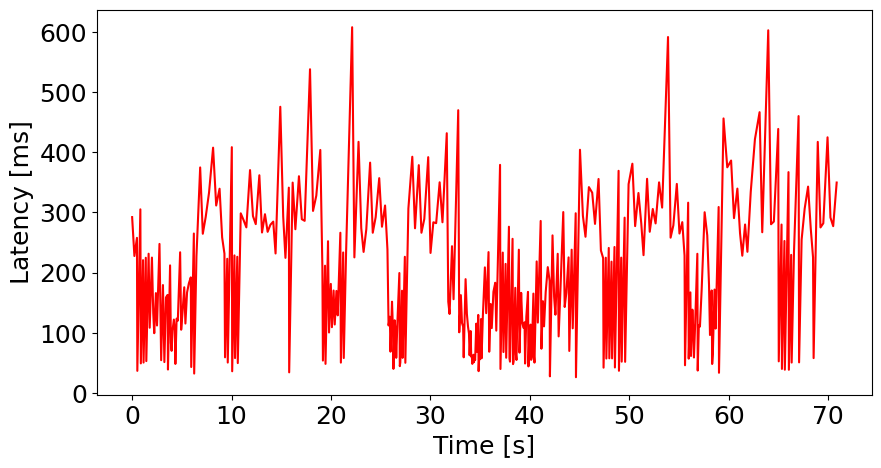

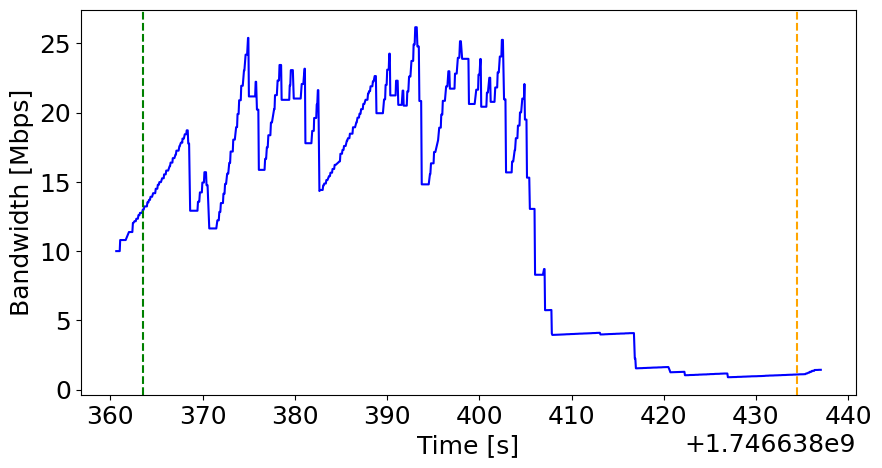

In [119]:
# print summary of the dataframe
print(latency.describe())
print(bw.describe())

# plot the latency
plt.figure(figsize=(10, 5))
plt.plot(latency['Timestamp']-latency['Timestamp'][0], latency['latency_ms'], label='Latency (ms)', color='red')
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms]')


plt.figure(figsize=(10, 5))
plt.plot(bw['Timestamp'],  bw['GCCBandwidth(b/s)']/1e6, label='Bandwidth (Mbps)', color='blue')
# vertical line at first and last timestamp of latency
plt.axvline(x=latency['Timestamp'][0], color='green', linestyle='--', label='Start of Latency')
plt.axvline(x=latency['Timestamp'].iloc[-1], color='orange', linestyle='--', label='End of Latency')
plt.xlabel('Time [s]')
plt.ylabel('Bandwidth [Mbps]')


        Timestamp  latency_ms  vLossRate  vDelayRate  vLoss     state   usage  \
0    1.746638e+09       292.3   12995940    12995940    0.0  increase  normal   
1    1.746638e+09       227.6   13229047    13229047    0.0  increase  normal   
2    1.746638e+09       257.8   13522416    13522416    0.0  increase  normal   
3    1.746638e+09        36.6   13522416    13630033    0.0  increase  normal   
4    1.746638e+09       305.2   13924790    13924790    0.0  increase  normal   
..            ...         ...        ...         ...    ...       ...     ...   
356  1.746638e+09       282.0    1050543     1052076    0.0  increase  normal   
357  1.746638e+09       425.0    1063395     1063395    0.0  increase  normal   
358  1.746638e+09       291.6    1068948     1071350    0.0  increase  normal   
359  1.746638e+09       277.2    1077081     1079836    0.0  increase  normal   
360  1.746638e+09       349.8    1089444     1091015    0.0  increase  normal   

     GCCBandwidth(b/s)  Rec

Text(0, 0.5, 'Latency [ms] / Bandwidth [Mbps]')

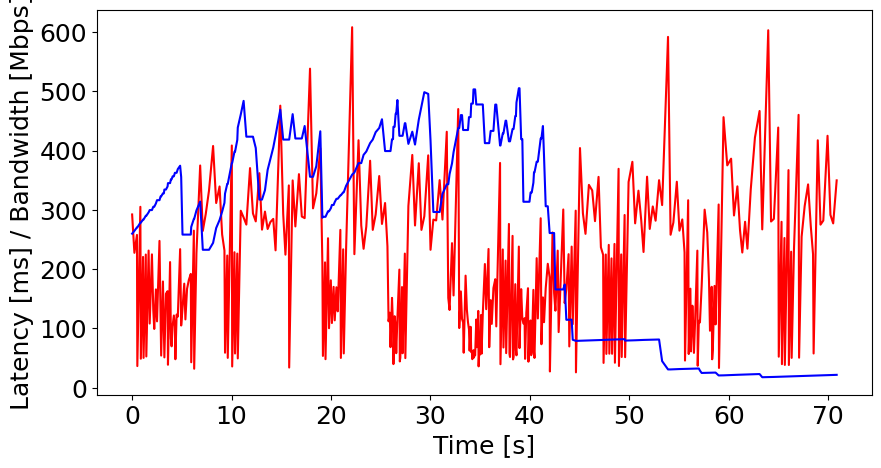

In [120]:
# allign latency and bw dataframes using timestamp

merged = pd.merge_asof(latency, bw, on='Timestamp', direction='nearest')

print(merged.head(400))
print("columns: ", merged.columns)


# plot the latency
plt.figure(figsize=(10, 5))
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), merged['latency_ms'], label='Latency (ms)', color='red')
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), merged['GCCBandwidth(b/s)']*20/1e6, label='Bandwidth (Mbps)', color='blue')
plt.xlabel('Time [s]')
plt.ylabel('Latency [ms] / Bandwidth [Mbps]')



describe:           Timestamp  latency_ms     vLossRate    vDelayRate       vLoss  \
count  3.610000e+02  361.000000  3.610000e+02  3.610000e+02  361.000000   
mean   1.746638e+09  196.863435  1.334544e+07  1.785307e+07    0.041758   
std    1.978041e+01  120.572113  8.345413e+06  1.270210e+07    0.100983   
min    1.746638e+09   26.000000  8.989880e+05  9.024810e+05    0.000000   
25%    1.746638e+09   96.200000  4.027872e+06  4.031195e+06    0.000000   
50%    1.746638e+09  192.000000  1.568602e+07  1.894668e+07    0.000100   
75%    1.746638e+09  281.000000  2.092932e+07  2.715972e+07    0.019100   
max    1.746638e+09  608.100000  2.526098e+07  5.559919e+07    0.676500   

       GCCBandwidth(b/s)  ReceiveEstimateBandwidth(b/s)  FrameDimension(B)  \
count       3.610000e+02                   3.610000e+02         361.000000   
mean        1.334794e+07                   1.613863e+07       92567.534626   
std         8.350427e+06                   1.826124e+07       56842.448113   
mi

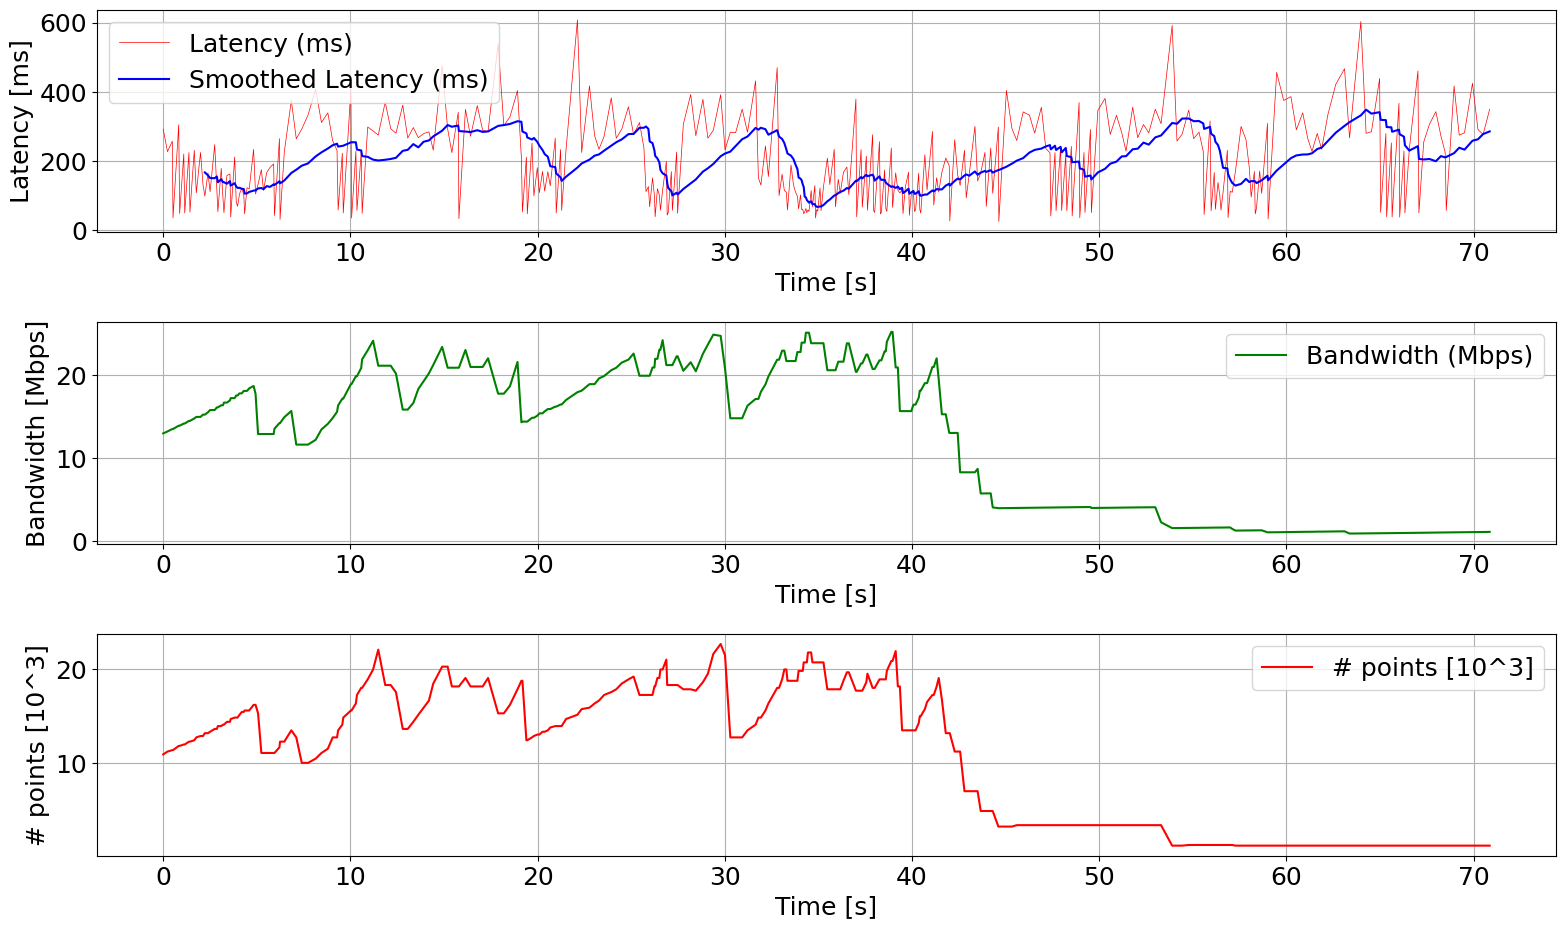

In [121]:
# smooth the latency data
merged['smoothed_latency_ms'] = merged['latency_ms'].rolling(window=15).mean()

plt.figure(figsize=(16, 9))
plt.subplot(3, 1, 1)
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), merged['latency_ms'], label='Latency (ms)', color='red', linewidth=0.5)
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), merged['smoothed_latency_ms'], label='Smoothed Latency (ms)', color='blue')
plt.ylabel('Latency [ms]')
plt.xlabel('Time [s]')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), merged['GCCBandwidth(b/s)']/1e6, label='Bandwidth (Mbps)', color='green')

plt.xlabel('Time [s]')
plt.ylabel('Bandwidth [Mbps]')
plt.legend()
plt.tight_layout()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(merged['Timestamp']-merged['Timestamp'].min(), ((merged['FrameDimension(B)'])/8)/1000, label='# points [10^3]', color='red')
plt.xlabel('Time [s]')
plt.ylabel('# points [10^3]')
plt.legend()
plt.grid(True)


print("describe:", merged.describe())


# 1 3 6 lab 
# 4 mobile
# 9 10 11 casa brescia
